# Predicting Usage of a Video Game Research Server

## Introduction:

### Background:
A Computer Science research group at UBC has set up a Minecraft server to learn about how people play video games. They are hoping to run their server smoothly, and gain insight on different players, and how they play the game. To do this, they have collected data on player data and gaming sessions. These datasets include things like player experience, whether they are subscribed to a game-related newsletter, session start and end time, and more. For this project I will be analyzing what characteristics of players can predict whether they are likely to subscribe to a game-related newsletter. Knowing this information could help the research group better understand players' engagement to the game, and tailor their newsletter's according to the audience. 

### Question:

Can player experience and played hours predict whether they are likely to subscribe to a game-related newsletter in the players dataset?

### Data Description:

To answer this question, I decided to use the players.csv dataset. This data set contains 196 rows, or observations, and 7 columns, or variables.  

The variables are:
- experience
  - given in the data type "character"
  - Tells us the player's experience in the game
- subscribe
  - given in the data type "logical"
  - Tells us whether or not the player is subscribed to the newsletter
- hashedEmail
  - given in the data type "character"
  - Provides us with the player's email (hashed)
- played_hours
  - given in the data type "double"
  - Tells us how many hours the player has spent playing on the server
- name
  - given in the data type "character"
  - Tells us the player's name
- gender
  - given in the data type "character"
  - Tells us the player's gender
- Age
  - given in the data type "double"
  - Tells us the player's age

About the data:
- Potential issues:
  - Hashed email is not human readable
  - Few numerical values
- For this project, I will be looking at the experience, played_hours, and newsletter columns

## Methods and Analysis

### Methods:

For this data analysis, I decided to run the K nearest neighbors classification. To do this I followed the following steps:
- Visualize the data in different ways (with bar graphs), to better understand the data and it's interaction with itself (Figures 1 and 2)
- Recode the experience column to be numerical, so that I can use it in the KNN classification algorithm
- Visualize the relationship between player experience and hours played for subscribing to a related newsletter. I noticed a trend, so that is what confirmed that I should continue with this idea. (Figure 3)
- Split the data into training and testing sets
- Build the recipe and model spec and create a workflow that tunes the KNN classifier, so that I will later be able to determine which K value to use.
- Visualize the relationship between K neighbors and accuracy of the classifier using cross validation (Figure 4)
- Determine the best K value
- Build another model spec using the previously determined best K value, and run it in a workflow
- Predict the subscribe values for the test set, and find metrics like accuracy, precision, and recall
- Done 🥳

### Analysis:

- I chose this method because it made the most sense for determining if player experience and hours played can predict whether a player subscribes to a newsletter. I was able to change the logical data type of the subscribe column to a factor type, such that I could use it for the class labels.
- In applying this method, I assumed the skill levels for the experience column, which needed to be done in order to run the KNN classification algorithm, as both predictor variables need to be numerical values. I set Beginner as 1, Amateur as 2, Regular as 3, Veteran as 4, and Pro as 5.
- One limitation is that the experience values were all intergers so I couldn't really get a good range of expereince levels.
- I compared various K values as shown in Figure 4, to determine the best k value, which I found to be 15. I chose the k value with the maximum accuracy.
- For processing the data, as mentioned earlier, I had to change variable types and values, like subscribe and experience.
- I decided to split the data into a training set and a testing set with a proportion of 75%, which I chose because I thought it would be a good compromise of enough testing data without severely impacting the quality of the model.
- I used cross validation when determining K to find the most accurate K value.

### Data Analysis:

In [33]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [34]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


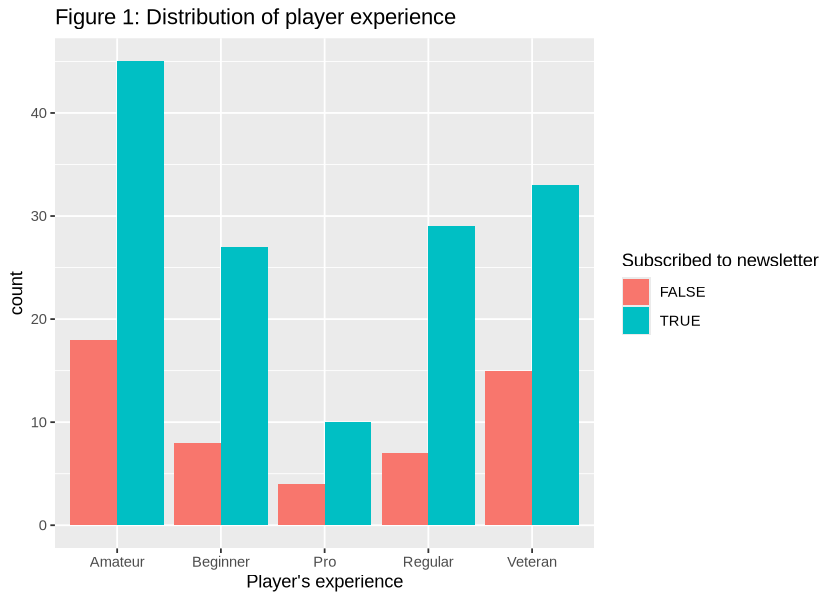

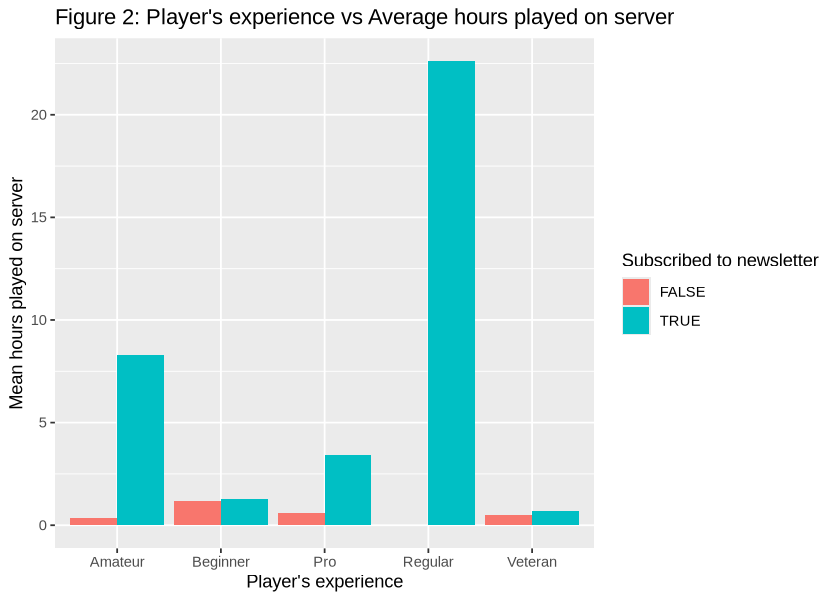

In [61]:
players_clean <- select(players, experience, subscribe, played_hours)

options(repr.plot.width = 7, repr.plot.height = 5)

players_viz1 <- ggplot(players_clean, aes(x = experience, fill = subscribe)) + 
    geom_bar(position = "dodge") + 
    labs(x = "Player's experience", fill = "Subscribed to newsletter") +
    ggtitle("Figure 1: Distribution of player experience") 

players_viz2 <- players_clean |>
    group_by(experience, subscribe) |>
    summarize(mean_hours = mean(played_hours)) |>
    ggplot(aes(x = experience, y = mean_hours, fill = subscribe)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    labs(x = "Player's experience", y = "Mean hours played on server", fill = "Subscribed to newsletter") +
    ggtitle("Figure 2: Player's experience vs Average hours played on server")

players_viz1
players_viz2

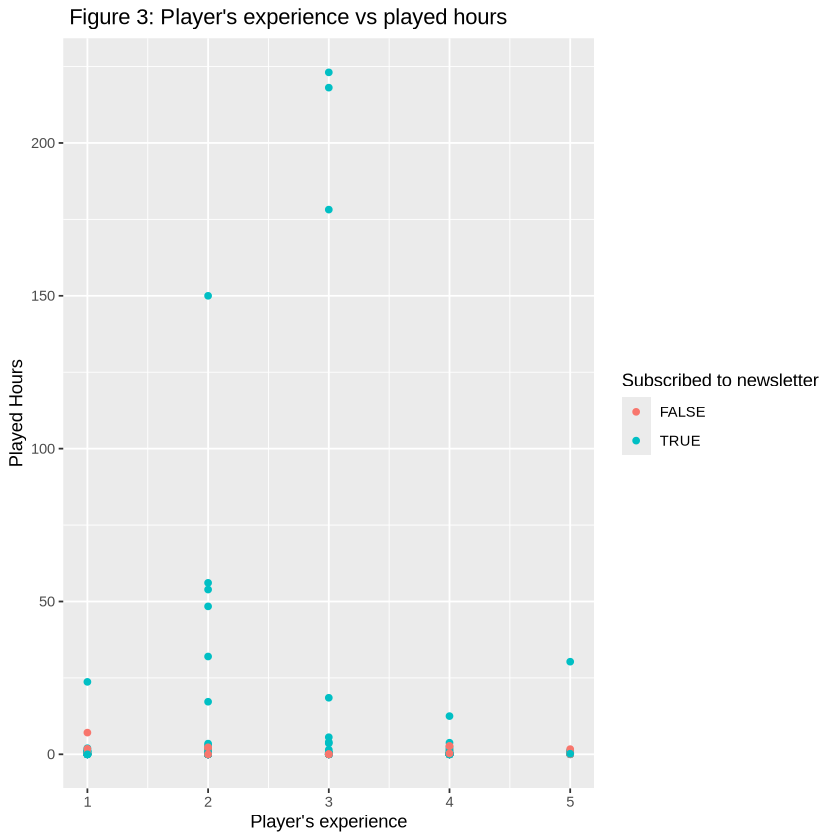

In [62]:
players3 <- players_clean |>
  mutate(exp_int = as.integer(factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))))

options(repr.plot.height = 7, repr.plot.width = 7)
players_viz3 <- players3 |>
    ggplot(aes(x = exp_int, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Player's experience", y = "Played Hours", color = "Subscribed to newsletter") +
    ggtitle("Figure 3: Player's experience vs played hours")
players_viz3

[1] 15

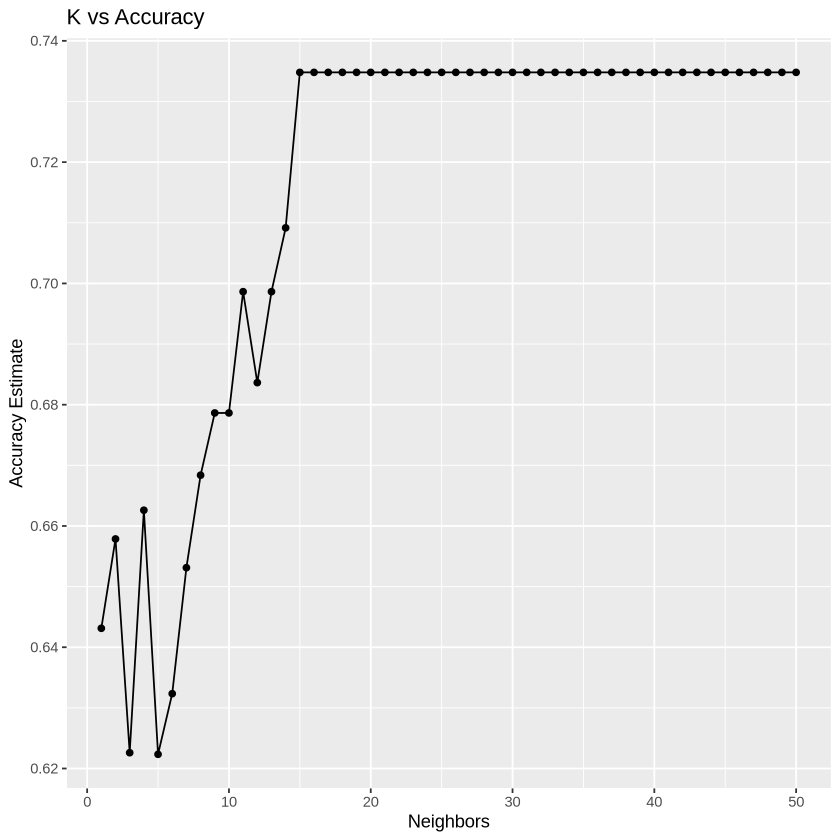

In [51]:
set.seed(1)
players3 <- players3 |>
    select(subscribe, exp_int, played_hours) |>
    mutate(subscribe = as.factor(subscribe))

players_split <- initial_split(players3, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split) 

players_vfold <- vfold_cv(players3, v = 5, strata = subscribe)

recipe <- recipe(subscribe ~ exp_int + played_hours, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

kvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() |>
    add_recipe(recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = kvals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy") 

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Figure 4: K vs Accuracy")

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

best_k
accuracy_vs_k

In [58]:
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(recipe) |>
    add_model(knn_spec2) |>
    fit(data = players_train)

player_predictions <- predict(knn_fit, players_test) |>
    bind_cols(players_test)

player_predictions

player_predictions |> 
    pull(subscribe) |>
    levels()

player_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

player_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")

player_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

.pred_class,subscribe,exp_int,played_hours
<fct>,<fct>,<int>,<dbl>
TRUE,TRUE,2,0.7
TRUE,TRUE,3,0.1
TRUE,TRUE,2,0.0
TRUE,TRUE,3,0.0
TRUE,FALSE,2,0.0
TRUE,TRUE,4,0.0
TRUE,TRUE,4,1.6
TRUE,TRUE,2,0.2
TRUE,TRUE,3,0.3


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7173913


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9166667


## Results and Discussion

### Results:

I found that I was able to predict whether a player would subscribe to a related newsletter based on their experience and hours played. 

I used a KNN classification algorithm where K = 15, which I determined using a tuning model. 

I found my classification model not be great because of the relatively low accuracy at 0.67, but the recall and precision is a lot better, as precision = 0.72 and recall = 0.92. 

I expected the model to work but not be very good, so this is what I expected.

### Discussion:

This finding could tell the researchers that they could tailor their newsletters to players that are more experienced or spend more time on the game.

This could lead to future questions about whether time played or player experience is more important of a factor in predicting whether a player would subscribe to a news